# K Means Algorithm (unsupervised machine learning)

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#### define a fake data sample using scikit

In [5]:
from sklearn.datasets import make_blobs

In [6]:
df = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [22]:
df[0].shape

(200, 2)

In [21]:
df[1].shape

(200,)

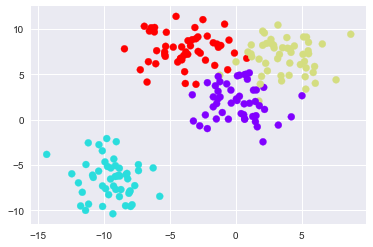

In [23]:
plt.scatter(df[0][:,0],df[0][:,1],c=df[1],cmap='rainbow')

## Import K Means

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

In [28]:
kmeans.fit(df[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851]])

In [31]:
# K Means is an unsupervised algorithm i.e. we can't compare the labels with the "real" labels since we don't 
# the "real" ones. The goal of the K Means is to find the "best" labels
kmeans.labels_

array([3, 2, 1, 2, 2, 0, 2, 1, 2, 1, 3, 1, 2, 2, 3, 1, 2, 1, 0, 3, 0, 1, 1,
       0, 3, 0, 0, 1, 2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 0, 1, 0, 3, 3, 3, 1, 2,
       3, 1, 0, 1, 1, 3, 2, 1, 0, 3, 1, 1, 3, 2, 0, 2, 0, 3, 2, 1, 0, 2, 2,
       0, 2, 1, 0, 1, 0, 2, 2, 1, 3, 1, 1, 0, 2, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       0, 1, 1, 0, 2, 3, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 3, 3, 2, 0,
       2, 3, 3, 2, 3, 1, 3, 1, 3, 1, 2, 3, 1, 0, 3, 3, 3, 1, 0, 0, 3, 2, 3,
       2, 1, 0, 2, 0, 3, 3, 2, 1, 0, 3, 3, 3, 3, 1, 2, 1, 3, 2, 2, 2, 1, 2,
       1, 1, 3, 0, 3, 1, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 2, 0, 2, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 1, 0, 2, 2, 3, 0, 1, 2, 2, 0, 1], dtype=int32)

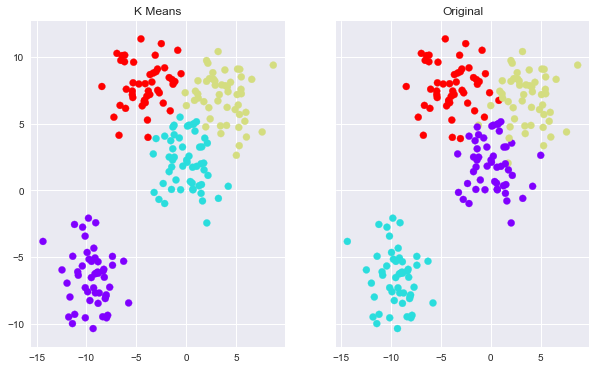

In [35]:
fig , (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df[0][:,0], df[0][:,1], c=kmeans.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(df[0][:,0], df[0][:,1], c=df[1], cmap='rainbow')

## New dataset

In [40]:
df = pd.read_csv('College_Data', index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [45]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


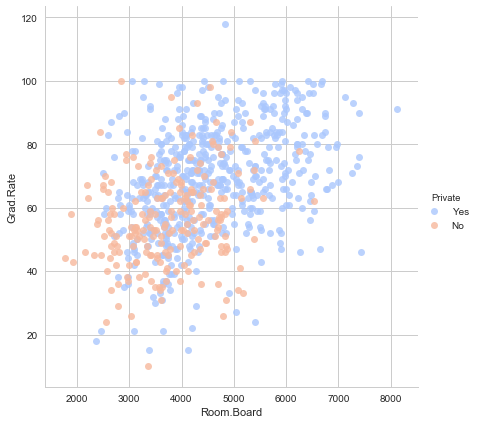

In [50]:
sb.set_style('whitegrid')
sb.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

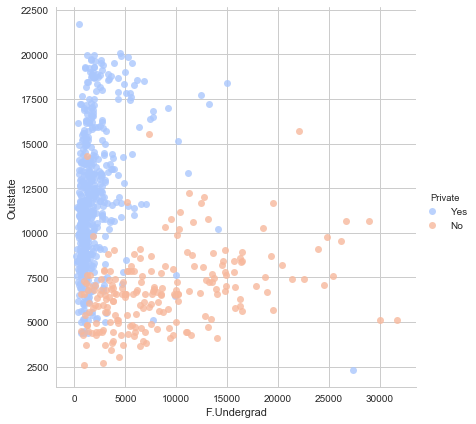

In [51]:
sb.lmplot('F.Undergrad','Outstate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [62]:
kmean_c = KMeans(n_clusters=2)

In [63]:
kmean_c.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)